# Project: Investigate The Movie Database (TMDB) Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, budget, revenues etc..

### Analysis Questions:

**1- Which year has been the most profitable for the film industry over the last ten years (2006-2015)?**

**2- What are the best and the worst years by audiences' choice through the period (2006-2015)?**


In [110]:
# This cell used to import the used libraries in the investigation of this dataset.
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this phase, the analyst should **gathering**, **assessing** and **cleaning** the dataset. These steps are important to **make the analysis more efficient**, and **make the data more consistent** which will lead to **more explanatory** visualizations and conclusions.

### General Properties

In [111]:
# Load our dataset and invistigating its shape, info, description methods.
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [112]:
# Shows the dataset count, mean, max, min, etc values.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [113]:
# shows the dataset information about columns and their data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

After reviewing the dataset information (**10866 rows and 21 columns**), i found some *incomplete columns* (columns which have null values within their cells), and trying to fill them with default value **'Not mentioned'**, as their data type is "Object".

| COLUMN_NAME | DATA_TYPE | DEFAULT_VALUE |
| --- | --- | --- |
| cast | Object | "Not mentioned" |
| Homepage | Object | "Not mentioned" |
| Director | Object | "Not mentioned" |
| Tagline | Object | "Not mentioned" |
| Keywords | Object | "Not mentioned" |
| Overview | Object | "Not mentioned" |
| genres | Object | "Not mentioned" |
| Production_companies | Object | "Not mentioned" |
| imdb_id | Object | "Not mentioned" |

In [114]:
# Filling the incomplete columns with the Deafult Value, as all of them have the same data type.
df.fillna('Not mentioned',inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10866 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
homepage                10866 non-null object
director                10866 non-null object
tagline                 10866 non-null object
keywords                10866 non-null object
overview                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj           

Another issue i noticed about the dataset that *'budget_adj'* & *'revenue_adj'* columns values' are switched to **scientific values**. Thus, i have to adjust the format of them, because i will use them to **calculate the profit for every associated film (in terms of 2010 dollars)**.

##### For example, please check the below table:

| COLUMN_NAME | VALUE |
| --- | --- |
| budget_adj | 1.379999e+08 |
| revenue_adj | 1.392446e+09 |

In [115]:
# Adjusting the values inside the two mentioned columns
df['budget_adj'] = df.budget_adj.apply(lambda x: '{:.0f}'.format(x))
df['revenue_adj'] = df.revenue_adj.apply(lambda x: '{:.0f}'.format(x))
df['revenue_adj'].head()

0    1392445893
1     348161292
2     271619025
3    1902723130
4    1385748801
Name: revenue_adj, dtype: object

In [116]:
# Creating new column called 'Real_Profit' which is equal to (revenue_adj - budget-adj)
df['Real_Profit'] = pd.to_numeric(df['revenue_adj']) - pd.to_numeric(df['budget_adj'])
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Real_Profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939,1392445893,1254445954


### Data Cleaning (Recap of the founded issues and how I solved them efficiently!):

##### Issue 1:
I found some columns have a missing values, and i will use some of them in my analysis. So i had to filling the columns with NULL values with a default value based on the data type of the column itself. And after checking the data types of all columns, i found them all are Object, so i made **the default value 'Not mentioned'**.

##### Issue 2:
Columns *'Budget_adj'* & *'Revenue_adj'* are having scientific notations (e) in their values which will not help me while i calculate the real profit for film makers or the high-profit films in my analysis. So I used the apply function to modify the format of the values and assigned them again to the mentioned columns. In addition to, I created a new column called *'Real_Profit'*, the values in this column was resulted **by subtracting budget_adj from revenue_adj**.
The values of *Real_Profit* are **(in terms of 2010 dollars)**

<a id='eda'></a>
## Exploratory Data Analysis

In this phase, the analyst should **explore** the data from many point of views and to illustrate his/her findings by **plotting the results in a suitable chart** which explains the idea of the exploration.


### Question 1 (Which year has been the most profitable for the film industry over the last ten years (2006-2015)?)

In [117]:
# first, we need to split our LARGE dataset to a new one which contains all rows for the last 10 years ONLY
last_10_df = df.query("release_year >= 2006")

In [118]:
#Secondly, It is not uncommon that films might have been failed, and the profit did not even reached the expenses.
#So, we need to filter our newely dataframe 'last_10_df' from any rows which have negative values in column 'Real_Profit' 

pos_last_10_df = last_10_df.query("Real_Profit > 0")

sorted_pos_last_10_df = pos_last_10_df.sort_values(['Real_Profit'], ascending=False)

sorted_pos_last_10_df.to_csv('High_profits_films_last_10.csv', sep=',')

In [119]:
# Now, we should get the counts of those high achieved profit films in each year

years = sorted_pos_last_10_df.groupby('release_year')['Real_Profit'].sum()

years.sort_values(ascending=False)

release_year
2015    18407218851
2012    16734954200
2014    15891915915
2013    15883023932
2009    15602903762
2011    15492117666
2010    14533151024
2007    13813610169
2008    13088038246
2006    11082924133
Name: Real_Profit, dtype: int64

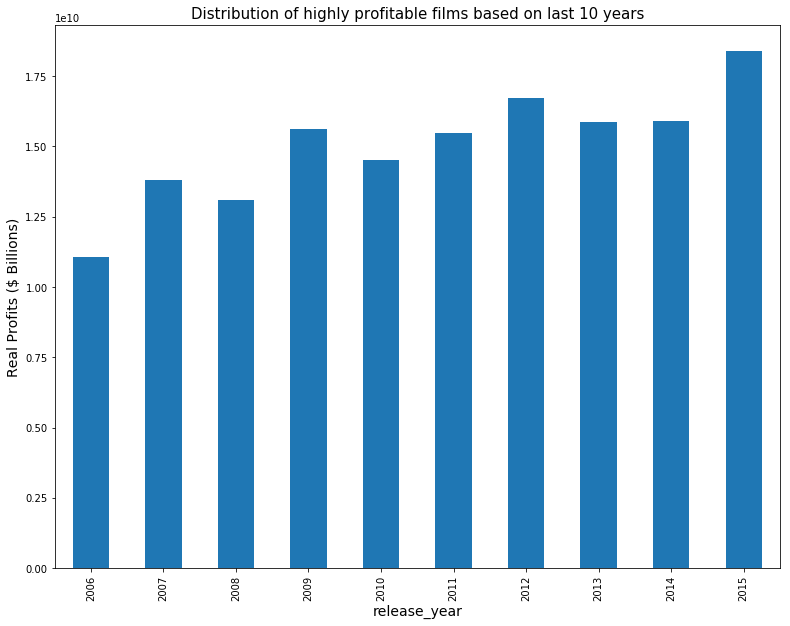

In [120]:
# This cell will plot our Series 'years' into bar chart

title = "Distribution of highly profitable films based on last 10 years"

plt.figure(figsize=(13,10));
plt.title(title, fontsize=15)
plt.xlabel('release_year', fontsize=14)
plt.ylabel('Real Profits ($ Billions)', fontsize=14)
years.plot.bar();
plt.show();

### Question 2 ( What are the best and the worst years by audiences' choice through the period (2006-2015)? )

In [121]:
# we will use the saved CSV file called 'High_profits_films_last_10.csv' to get what were the best and the worst 
# years by Audiences' choise over (2006-2015)

df =  pd.read_csv('High_profits_films_last_10.csv')

votes_mean = df.groupby('release_year')['vote_average'].mean()

votes_mean

release_year
2006    6.131333
2007    6.258621
2008    6.133121
2009    6.119424
2010    6.161875
2011    6.222652
2012    6.130769
2013    6.250515
2014    6.384239
2015    6.310615
Name: vote_average, dtype: float64

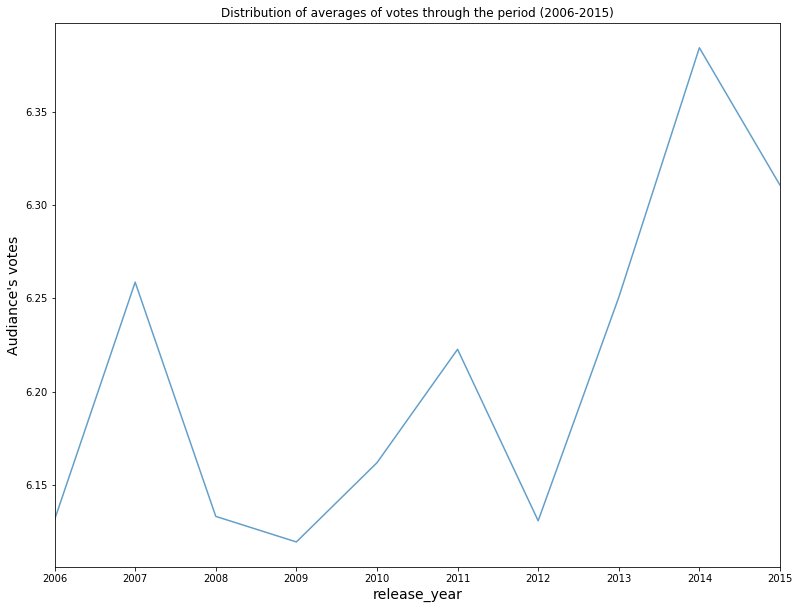

In [122]:
# This cell will plot our Series 'years' into line chart

plt.figure(figsize=(13,10));
plt.title(title, fontsize=15)
plt.xlabel('release_year' , fontsize=14)
plt.ylabel('Audiance\'s votes',fontsize=14)
votes_mean.plot(kind='line', title = "Distribution of averages of votes through the period (2006-2015)", alpha=0.7);
plt.show()

<a id='conclusions'></a>
## Conclusions

In this phase, the analyst should draw the conclusions he/she has reached after the exploration phase has been done successfully. In other words, this phase is more concentrated on how to communicate the analyst's findings in a **plain english text**.

### Regarding Research Question 1:
The bar plot has showed that the film industry witneseed ups and downs through the period of (2006 - 2015). However, the most year which was very profitable to the industry was **2015** with total of **18407218851 \$**,then **2012** with total of **16734954200 \$**. On the contrary, the least profitable year for the industry was **2006** with total of **11082924133 \$**.

### Regarding Research Question 2:
The line chart shows that the best year in the film industry through the period of (2006-2015) was **2014** with average votes equals to **6.38**. On the contrary, the audiance choose **2009** as the worst year in producing films with average votes equals to  **6.11**

#### Used resources in this investigation:
#### [StackOverFlow]( www.stackoverflow.com) 